### Audio Player Code

In [9]:
import pyaudio
import wave
import tensorflow as tf
import numpy as np

# Define audio settings
sampling_rate = 48000  # Adjust based on your needs
chunk_size = 1024  # Adjust for desired buffer size
record_seconds = 3  # Duration of recording

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open audio stream
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=sampling_rate,
    input=True,
    frames_per_buffer=chunk_size
)

# Record audio
frames = []
for i in range(0, int(sampling_rate / chunk_size * record_seconds)):
    data = stream.read(chunk_size)
    frames.append(data)

# Stop and close the stream
stream.stop_stream()
stream.close()
p.terminate()

# Save audio as WAV file
wavefile = wave.open("tester.wav", "wb")
wavefile.setnchannels(1)
wavefile.setsampwidth(p.get_sample_size(pyaudio.paInt16))
wavefile.setframerate(sampling_rate)
wavefile.writeframes(b''.join(frames))
wavefile.close()
print("Audio recorded and saved as WAV file")

import wave
import tensorflow as tf
import numpy as np

# Define audio settings
sampling_rate = 48000  # Adjust based on your needs

# Read the WAV file
wavefile_path = "tester.wav"
with wave.open(wavefile_path, 'rb') as wavefile:
    frames = wavefile.readframes(-1)
    sample_width = wavefile.getsampwidth()

# Convert byte data to NumPy array
audio_np = np.frombuffer(frames, dtype=np.int16)

# Convert to TensorFlow tensor
x = tf.convert_to_tensor(audio_np, dtype=tf.float32)

# Reshape the tensor to have the desired shape
x = tf.reshape(x[:sampling_rate], shape=[-1])  # This will reshape it to [48000]

# Ensure the correct sample rate
sample_rate_tf = wavefile.getframerate()
if sample_rate_tf != sampling_rate:
    raise ValueError(f"Sample rate mismatch. Expected {sampling_rate}, got {sample_rate_tf}.")

print("Audio successfully loaded.")


Audio recorded and saved as WAV file
Audio successfully loaded.


In [10]:
x.shape

TensorShape([48000])

In [12]:
audio_classification_model = tf.saved_model.load('saved')
preds = audio_classification_model(x[tf.newaxis, :])

In [13]:
from IPython import display
display.display(display.Audio("tester.wav", rate=sampling_rate))

TypeError: only size-1 arrays can be converted to Python scalars

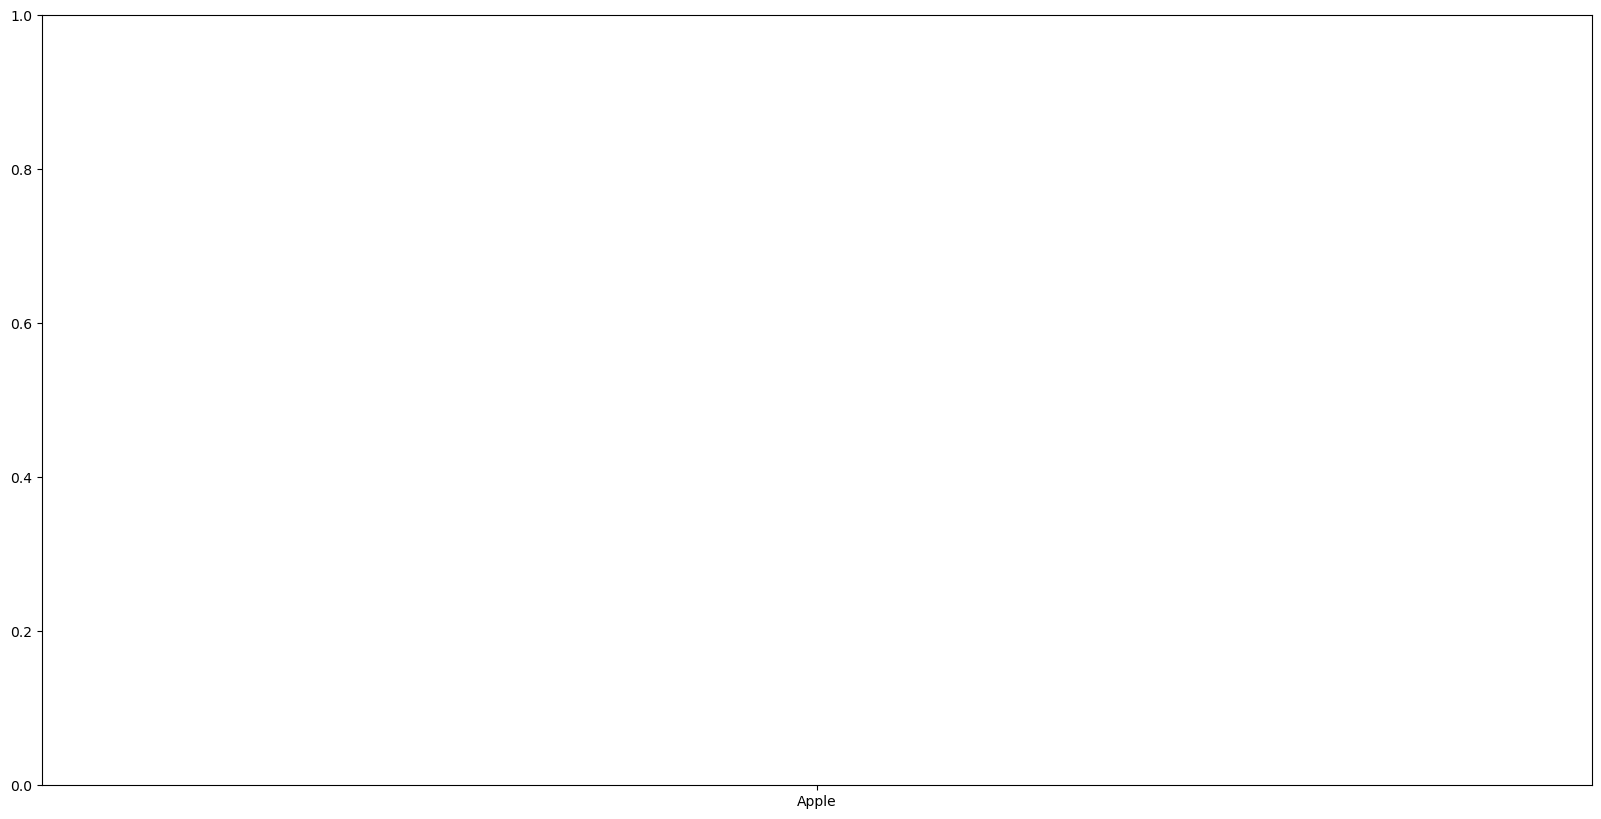

In [24]:
import matplotlib.pyplot as plt
import os

labels = os.listdir("Audio_Dataset_8")
plt.figure(figsize=(20, 10))
plt.bar(labels[:48], tf.nn.softmax(preds["predictions"]))
plt.title('Testing Live Audio')
plt.xticks(rotation='vertical')
plt.show()

In [22]:
preds["predictions"]

<tf.Tensor: shape=(1, 48), dtype=float32, numpy=
array([[1.11733904e-07, 4.81440949e-08, 1.11382803e-09, 1.22588952e-08,
        3.18803339e-09, 1.74722548e-08, 3.75946207e-08, 2.09377012e-11,
        9.25420018e-10, 8.96555412e-06, 7.83158538e-11, 1.36746137e-04,
        2.41301458e-11, 2.98291367e-13, 1.77961468e-08, 5.10848829e-11,
        8.01153779e-01, 2.24682685e-06, 4.72682927e-07, 2.14936891e-09,
        1.00295638e-09, 9.19532894e-10, 4.70994637e-05, 2.09118043e-05,
        1.20393903e-11, 7.91308755e-11, 3.15584174e-07, 4.38429706e-04,
        4.61913992e-08, 5.99052943e-03, 3.79562471e-06, 2.26140218e-11,
        6.97133690e-02, 1.45783066e-04, 1.07910946e-05, 1.16196424e-01,
        4.31346834e-08, 6.70581585e-06, 1.80720108e-05, 2.73488718e-06,
        5.91666857e-03, 9.40118809e-08, 1.85644065e-04, 4.47031709e-08,
        1.92651370e-08, 4.46642411e-11, 8.19816524e-12, 2.68783901e-11]],
      dtype=float32)>